In [30]:
import torch
import torchvision
import torchvision.models as models
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
models.alexnet(pretrained=True) ##pretrained=True : 사전 학습된 것 불러옴

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

### AdaptiveAvgPool2d(output_size=(6, 6)) : 전체 Spatial size를 줄이고 하나의 채널의 백터만 남긴다
- 마지막 feature 출력 구조를 지나면 6x6x256이 되고, AdaptiveAvgPool2d연산을 하면 1x1x256가 된다.

torch.Size([1, 3, 360, 640])


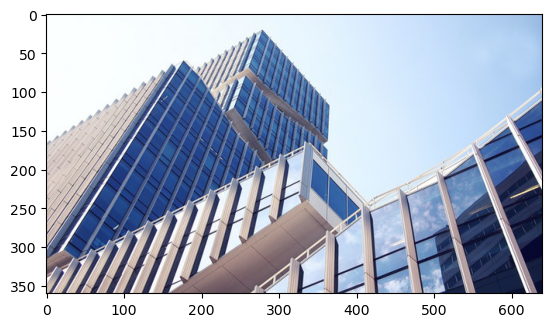

In [15]:
image = 'building.jpg'
image = Image.open(image).convert('RGB')
plt.imshow(image)

to_tensor = torchvision.transforms.ToTensor()
normalizer = torchvision.transforms.Normalize(mean=[0.485,0.456,0.406],
                                              std = [0.229,0.224,0.225])
image = normalizer(to_tensor(image))
image = image.unsqueeze(0)
print(image.shape)


In [52]:
alexnet1 = models.alexnet(pretrained=True)
alexnet1.eval() ## 모델을 평가모드로
alexnet1.train()##모델을 훈려모드로
alexnet1.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### forward

In [23]:
print(f"input_size : {image.shape}")

logit = alexnet(image)

print("output shape",logit.shape,logit)

print(torch.argmax(logit))

input_size : torch.Size([1, 3, 360, 640])
output shape torch.Size([1, 1000]) tensor([[-2.3652e+00, -2.3521e+00,  1.5452e+00, -3.0132e+00, -1.0148e+00,
         -2.8739e+00, -4.6825e+00, -1.4806e+00, -3.3929e+00,  4.3103e-01,
         -2.4273e+00, -2.6888e+00, -6.1287e-01, -1.4428e+00,  2.4311e-01,
          1.6258e-01, -7.5160e-01,  4.7191e-02,  6.1549e-01, -1.2828e+00,
         -2.7347e+00,  1.6206e-01, -6.3084e-01,  2.4250e+00, -3.2086e-01,
         -4.3186e+00, -4.8394e+00, -3.3268e+00, -3.8477e+00, -4.7437e+00,
         -3.1356e+00, -4.7079e+00, -6.4292e+00, -2.7957e+00, -1.4180e+00,
         -4.8753e+00, -3.4097e+00, -1.4535e+00, -2.5538e+00, -2.2998e+00,
         -2.2155e+00, -3.2325e+00, -3.7361e+00, -2.2394e+00, -1.8028e+00,
         -1.4658e+00, -2.0120e+00, -2.8644e+00, -3.4390e+00, -3.2938e+00,
         -1.9387e+00, -1.5477e+00, -3.2515e+00, -3.6641e+00, -1.5327e+00,
         -4.1586e+00, -3.5351e+00, -3.7071e+00, -1.7798e+00, -2.1671e+00,
         -3.3201e+00, -4.9854e+00, 

#### cifar 10 불러오기

In [24]:
cifar10 = torchvision.datasets.CIFAR10(root = './',download=True)

100.0%


Extracting ./cifar-10-python.tar.gz to ./


In [25]:
len(cifar10)

50000

In [61]:
alexnet1.features[0]=nn.Conv2d(3,64,kernel_size=(4,4),padding=(2,2))
alexnet1.classifier[6]=nn.Linear(in_features=4096,out_features=10)

In [59]:
alexnet1


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
   

In [67]:
from torchsummary import summary
summary(alexnet1,(3,32,32),device='cuda:0')
    

AssertionError: Input device is not valid, please specify 'cuda' or 'cpu'

#### 불러온 이미지 하나 보기

(32, 32) 6
tensor([[ 0.3333, -0.4940,  0.2063,  0.1934, -0.2209,  0.4382,  0.0670,  0.1509,
         -0.2532, -0.0064]], grad_fn=<AddmmBackward0>)
tensor([5])
torch.Size([1, 10])
torch.Size([1, 3, 32, 32])


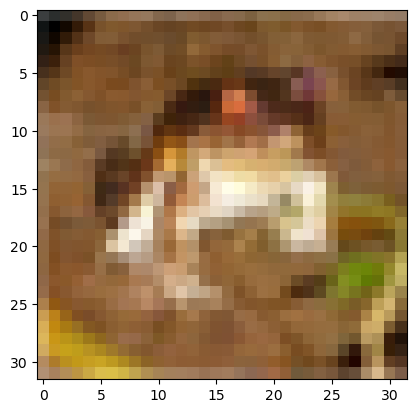

In [66]:
for img,labels in cifar10 : 
    print(img.size,labels)
    
    plt.imshow(img)
    plt.show
    
    img=normalizer(to_tensor(img))
    img = img.unsqueeze(0)
    
    predict = alexnet1(img)
    print(predict)
    print(predict.argmax(1))
    print(predict.shape)
    print(img.shape)
    break 